### Student Information
Name: 馬禹平

Student ID: 111062611

GitHub ID: vivian1311

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### 0: Preparation

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import pickle
%matplotlib inline

In [2]:
# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
with open('./twenty_train.pkl', 'rb') as f:
    twenty_train = pickle.load(f)

## Task 1: Take home assignment

**Converting Dictionary into Pandas Dataframe**

In [3]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

---

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
# get five data from backcount
X.iloc[::-1][0:5]

text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   

     category_name  
2256       sci.med  
2255       sci.med  
2254       sci.med  
2253       sci.med  
2252       sci.med

In [6]:
# get the 5 to 10 data with text and category
X.loc[5:10, 'text':'category']

text  category
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np
# prepare dataframe
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
# check if the 'missing example' is null
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**<font color="red">Answer</font>**

For C, D, and F, all of the data types are 'string', so the function will consider these as the value of the 'missing_example' column. 

For A(numpy.NaN), B(missing value), and E(None object), all of these data represent None value, which will be detected by `.isnull()` function.

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# duplicate X as X_test
X_test = X

In [10]:
# sampleing
X_sample = X_test.sample(n=1000) #random state

In [11]:
X_test[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

In [12]:
X_sample[0:4]

text  category  \
694  From: greg@cs.uct.ac.za (Gregory Torrance) Sub...         1   
707  From: jerryb@eskimo.com (Jerry Kaufman) Subjec...         3   
937  From: whitsebd@nextwork.rose-hulman.edu (Bryan...         3   
885  Organization: University of Illinois at Chicag...         2   

              category_name  
694           comp.graphics  
707  soc.religion.christian  
937  soc.religion.christian  
885                 sci.med

In [13]:
# check if there is any change in X_test after sample
X_test.equals(X)

True

**<font color="red">Answer</font>**

The index of X_sample is not ordered. About X, since the default parameters of `.sample()` won't affect the original X, there is no change to the X dataframe. Also, we can use `.equals()` to check if two dataframes are same.

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [14]:
# import library
import matplotlib.pyplot as plt
%matplotlib inline

X statistic:
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
X sample statistic:
comp.graphics             279
sci.med                   273
soc.religion.christian    239
alt.atheism               209
Name: category_name, dtype: int64


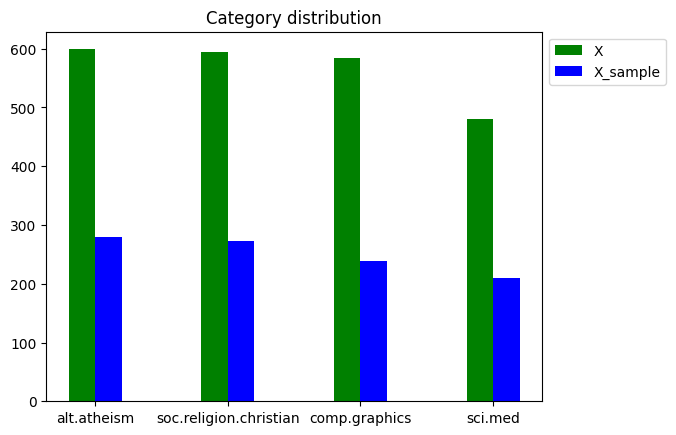

In [15]:
# plot with matplotlib
# show the statistics
print('\033[36mX statistic:\033[0m')
print(X.category_name.value_counts())
print('\033[36mX sample statistic:\033[0m')
print(X_sample.category_name.value_counts())
# get the plot data
X_plot = X.category_name.value_counts()
X_sample_plot = X_sample.category_name.value_counts()

# plot the graph
x = np.arange(len(categories))
width = 0.2
plt.bar(x, X_plot, width, color = 'green', label = 'X')
plt.bar(x + width, X_sample_plot, width, color = 'blue', label=  'X_sample')
plt.xticks(x + width / 2, categories)
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()                                           

<AxesSubplot: title={'center': 'Category distribution'}>

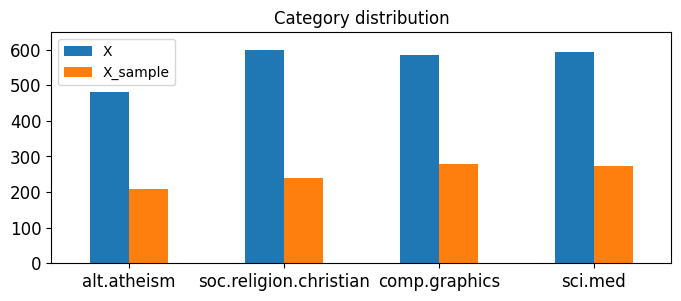

In [16]:
# plot with pandas
df = pd.DataFrame({'X': X_plot,
                   'X_sample': X_sample_plot},
                  index=categories)
max_X = max(X.category_name.value_counts())
max_X_sample = max(X_sample.category_name.value_counts())
df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, max(max_X, max_X_sample) + 50],
        rot = 0, fontsize = 12, figsize = (8,3))

Here I try two different to plot the graph.

---

In [17]:
import nltk

In [18]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [19]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
X_counts.shape

(2257, 35788)

In [21]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
print(len(list(count_vect.get_feature_names_out())))
count_vect.get_feature_names_out()[:10]

35788


array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [22]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [23]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [24]:
# get the fifth record and turn it into one dimension array
X_array_4 = X_counts[4, 0:100].toarray().flatten()
X_array_4

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# find the indeces which do not equal to 1 and show the names of terms
result = np.where(X_array_4 != 0)
print(result)
count_vect.get_feature_names_out()[result]

(array([ 0, 37]),)


array(['00', '01'], dtype=object)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [26]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
# obtain document features
plot_z = X_counts[0:20, 0:20].toarray()

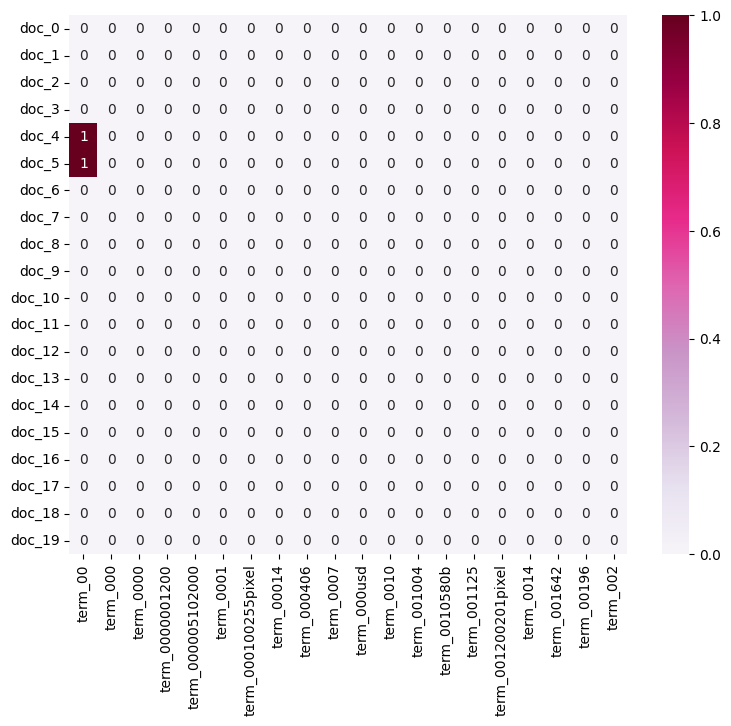

In [27]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Since the document-term matrix is a sparse matrix, we can use `spy` to plot the figure efficiently. `spy` plot the values of the array that is greater than the set precision. Since it plot the figure in a discrete way, it is more efficient than `seabons` which plot in a continuous way.

In [28]:
from matplotlib.pyplot import spy

In [29]:
np.max(X_counts)

589

In [30]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [31]:
max(term_frequencies)

29825

In [32]:
# devide the frequencies into 6 parts
print(np.percentile(term_frequencies, 20))
print(np.percentile(term_frequencies, 40))
print(np.percentile(term_frequencies, 60))
print(np.percentile(term_frequencies, 80))
print(np.percentile(term_frequencies, 90))

1.0
1.0
3.0
8.0
20.0


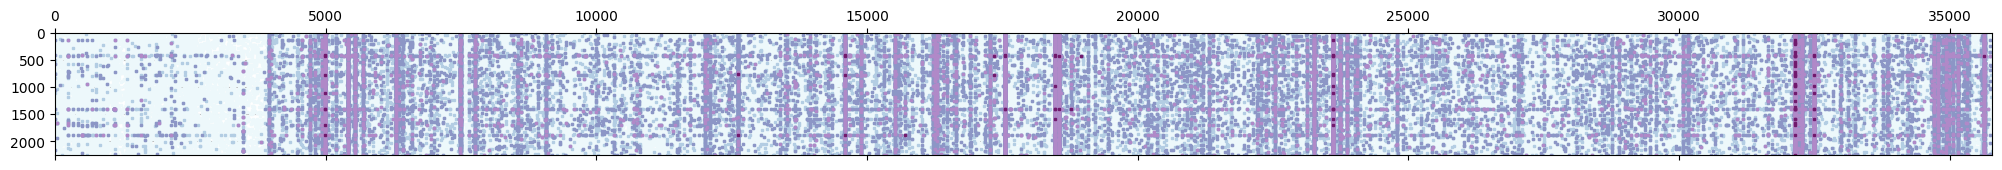

CPU times: user 572 ms, sys: 10.2 ms, total: 582 ms
Wall time: 225 ms


In [33]:
%%time
plt.subplots(figsize=(25, 15))
# different precisions correspond to different color
precisions = [0, 2, 3, 8, 20, 100]
colors = ['#edf8fb', '#b3cde3', '#8c96c6', '#b089c8', '#b089c8', '#71196d']

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision = p, color = c, markersize=2)
plt.grid('on')
plt.show()

There are too many terms and documents, leading to a huge term-document matrix that is not nie visualize. To get a nice visualization figure with important informations, I show the 20 most commonly used terms in the first 20 document.

In [34]:
# get the first 20 document
X_20 = X[:20]
# get the 20 most commonly used terms
count_vect_top20 = CountVectorizer(max_features=20)
X_counts_20 = count_vect_top20.fit_transform(X_20.text) #learn the vocabulary and return document-term matrix
X_counts_20.shape

(20, 20)

In [35]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect_top20.get_feature_names_out()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X_20.index)]
# obtain document features
plot_z = X_counts_20.toarray()

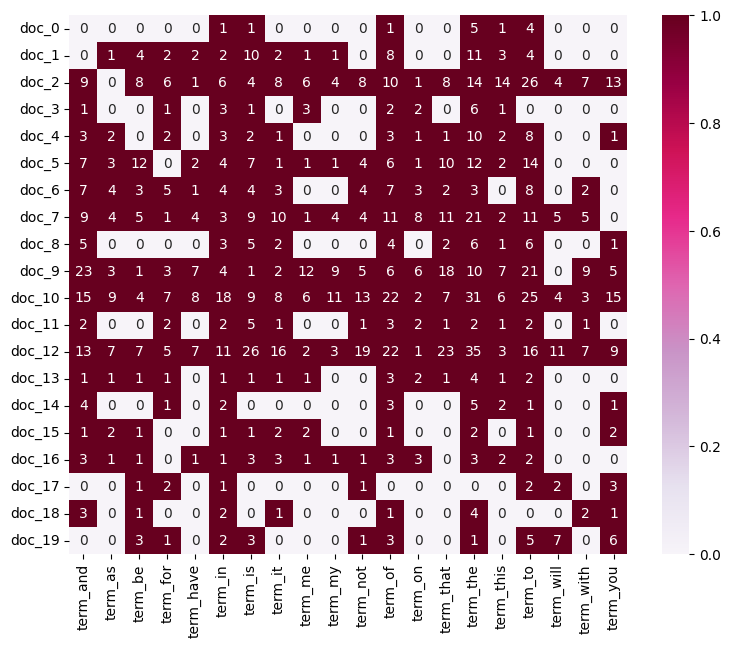

In [36]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

From the above matrix, we can observe that the most commonly used terms mostly are stopwords in NLP. That's why in most cases in NLP, we remove these terms. 

---

In [37]:
from sklearn.decomposition import PCA

In [38]:
# reduce the dimension to 2
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 2)

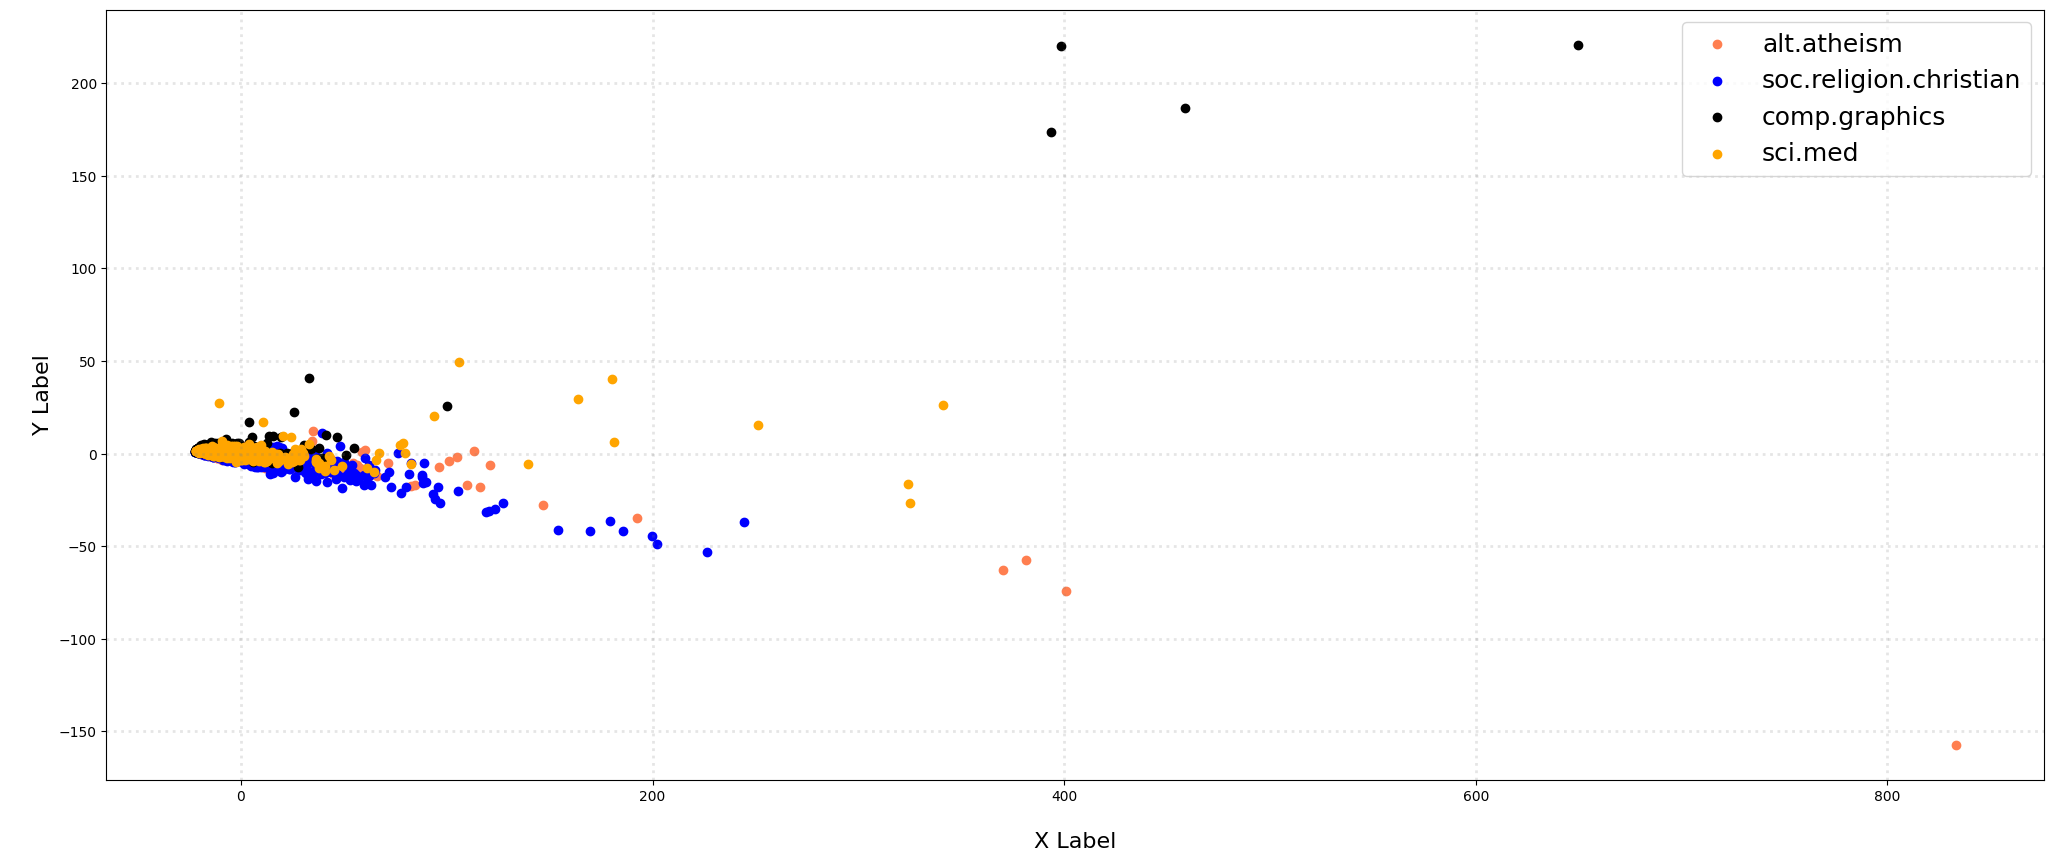

In [39]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o', label=category)
    
ax.legend(fontsize=18)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label', fontsize=16)
ax.set_ylabel('\nY Label', fontsize=16)

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [40]:
# reduce the dimension to 3
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

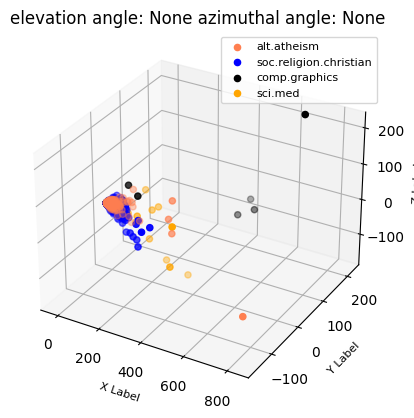

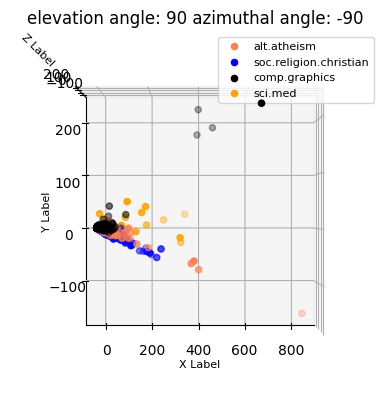

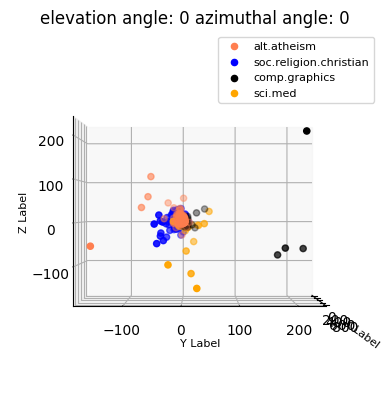

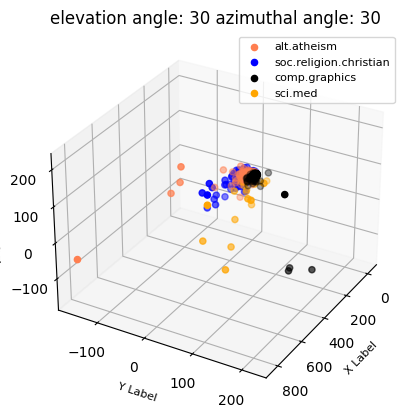

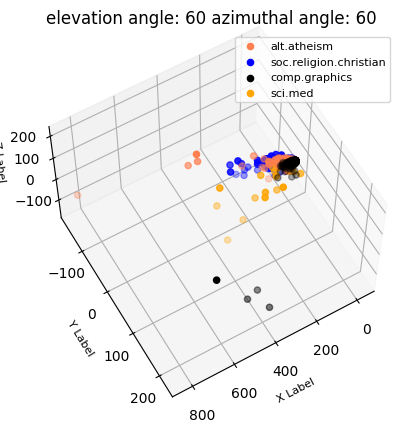

In [41]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']

# plot
def plot3D(elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o', label=category)

    ax.legend(fontsize=8)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('X Label', fontsize=8)
    ax.set_ylabel('Y Label', fontsize=8)
    ax.set_zlabel('Z Label', fontsize=8)
    ax.set_title(f'elevation angle: {elev} azimuthal angle: {azim}')
    ax.view_init(elev = elev, azim = azim)  # add the camera position; elev: elevation angle; azim: azimuthal angle
    plt.show()


for elev, azim in zip([None, 90, 0, 30, 60], [None, -90, 0, 30, 60]):
    plot3D(elev, azim)

**<font color="red">Discussion</font>**
1. Look at the second figure (elevation angle: 90 azimuthal angle: -90), we can observe that the distribution of the data points is similar to the 2-D figure
2. We can observe that the shades of colors are different. The darker one is closer to us.

---

In [42]:
term_frequencies = []
# reduce the amount of terms to 100
for j in range(0, 100):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [43]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [44]:
term_frequencies[0] #sum of first term

134

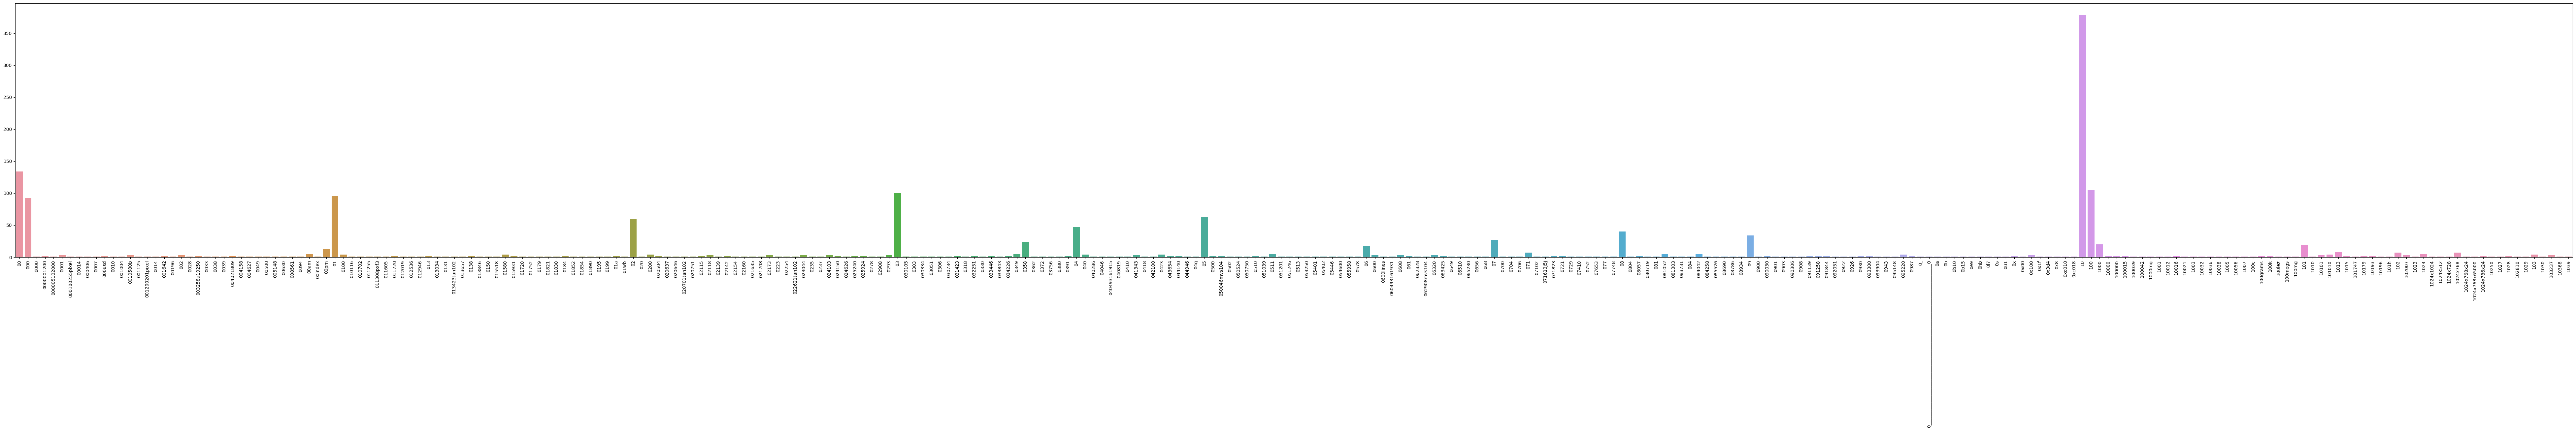

In [45]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [46]:
import plotly.express as px
import plotly.graph_objects as go

In [47]:
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

**<font color="red">Discussion</font>**

The figure plotted using plotly can see the coordinates clearly by not showing all of them.

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


**By setting threshold**

In [48]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [49]:
len(term_frequencies)

35788

In [50]:
# set a threshold to select the top 10% terms
threshold = np.percentile(term_frequencies, 90)
X_count_10precent = np.array(count_vect.get_feature_names())[term_frequencies >= threshold]
term_frequencies_10precent = term_frequencies[term_frequencies >= threshold]
len(term_frequencies_10precent)

/Users/vivian/anaconda3/envs/DM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



3627

In [51]:
fig = px.bar(x=X_count_10precent, y=term_frequencies_10precent)
fig.show()

**Get top 100 commonly used terms**

In [52]:
# get the 100 most commonly used terms
count_vect_top100 = CountVectorizer(max_features=100)
X_counts_100 = count_vect_top100.fit_transform(X.text) #learn the vocabulary and return document-term matrix
X_counts_100.shape

(2257, 100)

In [53]:
type(count_vect_top100.get_feature_names_out())

numpy.ndarray

In [54]:
term_frequencies_top100 = np.asarray(X_counts_100.sum(axis=0))[0]

In [55]:
fig = px.bar(x=count_vect_top100.get_feature_names_out(), y=term_frequencies_top100)
fig.show()

Here I select the 100 most frequently used terms in all documents and visualize it.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

In [56]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [57]:
sorted_x_count_vect = []
# get the term-frequency pair to sort
for x, y in zip(count_vect.get_feature_names_out(), term_frequencies):
    sorted_x_count_vect.append((x, y))

In [58]:
# sort the terms by frequency
sorted_x_count_vect.sort(key = lambda s: s[1], reverse = True)

In [59]:
# get the x-axis and y-axis to plot
x_plot = np.array([x[0] for x in sorted_x_count_vect])
y_plot = np.array([x[1] for x in sorted_x_count_vect])

In [60]:
# Find the boundary of long tail part which let the sum of left array is equal to sum of right array
def findEvenIndex(arr):
    for i in range(len(arr)):
        left_sum = sum(arr[0:i])
        right_sum = sum(arr[i+1:])
        if(left_sum >= right_sum):
            return i
    return -1

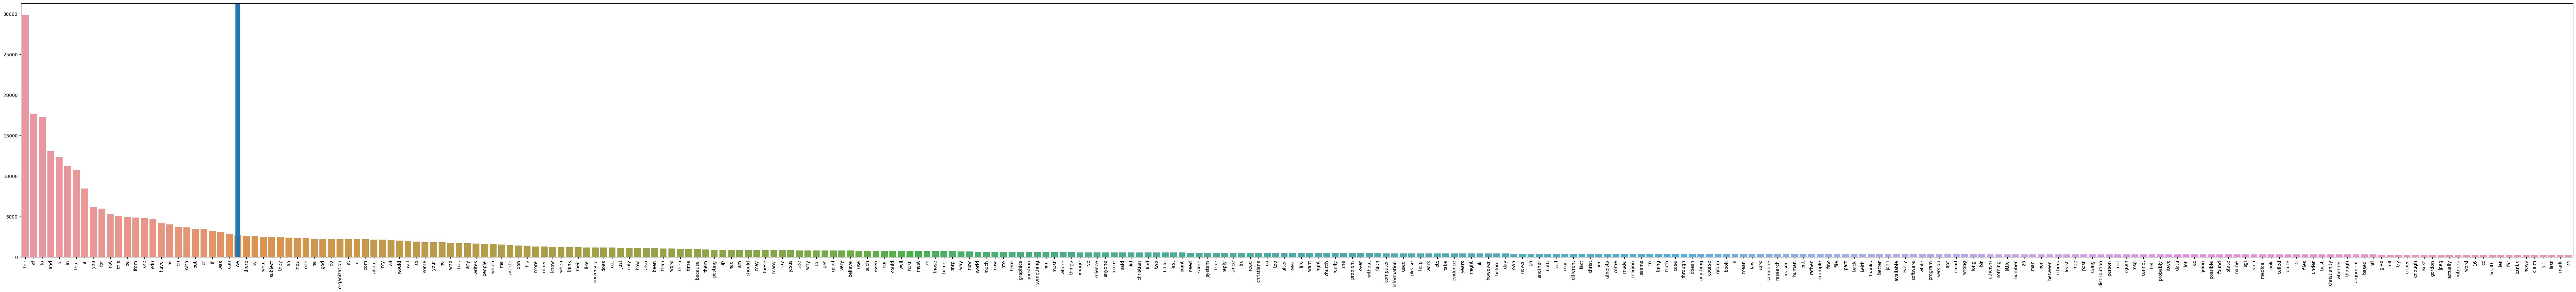

In [61]:
plt.subplots(figsize=(100, 10))
plt.axvline(x=findEvenIndex(y_plot[:300]), linewidth=10)  # show the boundary of long tail part
g = sns.barplot(x=x_plot[:300], 
                y=y_plot[:300])
g.set_xticklabels(x_plot[:300], rotation = 90);

In [62]:
fig = px.bar(x=x_plot[:300], y=y_plot[:300])
# show the boundary of long tail part
fig.add_vline(x=findEvenIndex(y_plot[:300]), line_width=3, line_dash="dash", line_color="green")
fig.show()

---

In [63]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [64]:
mlb.fit(X.category)

LabelBinarizer()

In [65]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [66]:
X[:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [67]:
X['bin_category_2'] = mlb.transform(X['category']).tolist()

In [68]:
X[:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   

   bin_category bin_category_2  
0  [0, 1, 0, 0]   [0, 1, 0, 0]  
1  [0, 1, 0, 0]   [0, 1, 0, 0]  
2  [0, 0, 0, 1]   [0, 0, 0, 1]  
3  [0, 0, 0, 1]   [0, 0, 0, 1]  
4  [0, 0, 0, 1]   [0, 0, 0, 1]

**<font color="red">Discussion</font>**

The transformer also work. The transformer is based on the numbers of the number you want to transform.

## Task 2: Preprocessing the new dataset

### 0. Data Set Information:

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.


**Format:**
sentence score


**Details:**
Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

**Attribute Information:**

The attributes are text sentences, extracted from reviews of products, movies, and restaurants


### 1. Prepare data
Here I use read line to get the data from the texts. Futher, I add the file name as an attribute to record which the source is the sentence belongs to.

In [69]:
import os, glob
from pathlib import Path
path = Path('./sentiment labelled sentences')
# get all the text file in the new data folder
list(path.glob("*.txt"))

[PosixPath('sentiment labelled sentences/amazon_cells_labelled.txt'),
 PosixPath('sentiment labelled sentences/yelp_labelled.txt'),
 PosixPath('sentiment labelled sentences/imdb_labelled.txt')]

In [70]:
# read a file line by line and append to the list
sentence, score, file = [], [], []
for filepath in path.glob("*.txt"):
    with open(filepath, 'r') as f:
        file_name = f.name.split('/')[1].split('.')[0]   # get the file name
        for line in f:
            sentence.append(line.strip().split('\t')[0]) # read line and clean the data
            score.append(line.strip().split('\t')[1])
            file.append(file_name)                       # add attribute 'file'

In [71]:
# form the dataframe by lists
df = pd.DataFrame(list(zip(sentence, score, file)), columns =['sentence', 'score', 'source'])

In [72]:
# replace the score and source
df["score"] = df["score"].str.replace("0", "negative")
df["score"] = df["score"].str.replace("1", "positive")
df["source"] = df["source"].str.replace("amazon_cells_labelled", "amazon")
df["source"] = df["source"].str.replace("yelp_labelled", "yelp")
df["source"] = df["source"].str.replace("imdb_labelled", "imdb")

In [73]:
df

sentence     score  source
0     So there is no way for me to plug it in here i...  negative  amazon
1                           Good case, Excellent value.  positive  amazon
2                                Great for the jawbone.  positive  amazon
3     Tied to charger for conversations lasting more...  negative  amazon
4                                     The mic is great.  positive  amazon
...                                                 ...       ...     ...
2995  I just got bored watching Jessice Lange take h...  negative    imdb
2996  Unfortunately, any virtue in this film's produ...  negative    imdb
2997                   In a word, it is embarrassing.    negative    imdb
2998                               Exceptionally bad!    negative    imdb
2999  All in all its an insult to one's intelligence...  negative    imdb

[3000 rows x 3 columns]

In [74]:
# check if the data set have 1500 positive label and 1500 negative label
print(df.score.value_counts())

negative    1500
positive    1500
Name: score, dtype: int64


### 2. Data mining using Pandas

In [75]:
# import helpers_new_dataset.data_mining_helpers as dmh_new

**2.1 Check the data**

In [76]:
# check the data
df.iloc[:10]

sentence     score  source
0  So there is no way for me to plug it in here i...  negative  amazon
1                        Good case, Excellent value.  positive  amazon
2                             Great for the jawbone.  positive  amazon
3  Tied to charger for conversations lasting more...  negative  amazon
4                                  The mic is great.  positive  amazon
5  I have to jiggle the plug to get it to line up...  negative  amazon
6  If you have several dozen or several hundred c...  negative  amazon
7        If you are Razr owner...you must have this!  positive  amazon
8                Needless to say, I wasted my money.  negative  amazon
9                   What a waste of money and time!.  negative  amazon

In [77]:
# first sentence of three files
df.iloc[::1000][:3]

sentence     score  source
0     So there is no way for me to plug it in here i...  negative  amazon
1000                           Wow... Loved this place.  positive    yelp
2000  A very, very, very slow-moving, aimless movie ...  negative    imdb

**2.2 Check the missing value**

In [78]:
# check missing value
df.isnull()

sentence  score  source
0        False  False   False
1        False  False   False
2        False  False   False
3        False  False   False
4        False  False   False
...        ...    ...     ...
2995     False  False   False
2996     False  False   False
2997     False  False   False
2998     False  False   False
2999     False  False   False

[3000 rows x 3 columns]

In [79]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

Now, we add a dummy data to check how `.isnull()` function works.

In [80]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1,
              }]
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [81]:
len(df)

3001

In [82]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   1

In [83]:
# drop the null data and check the result
df.dropna(inplace=True)
print(len(df))
df.isnull().apply(lambda x: dmh.check_missing_values(x))

3000


sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

**2.3 Check the duplicated data**

In [84]:
sum(df.duplicated(['sentence', 'source']))

17

In [85]:
# show the duplicated data
pd.concat(g for _, g in df.groupby(['sentence', 'source']) if len(g) > 1)

sentence     score  source
2125                                            10/10    positive    imdb
2788                                            10/10    positive    imdb
2090                   Definitely worth checking out.    positive    imdb
2363                   Definitely worth checking out.    positive    imdb
446                                       Does not fit.  negative  amazon
748                                       Does not fit.  negative  amazon
180                             Don't buy this product.  negative  amazon
543                             Don't buy this product.  negative  amazon
402                    Excellent product for the price.  positive  amazon
892                    Excellent product for the price.  positive  amazon
290                                        Great Phone.  positive  amazon
792                                        Great Phone.  positive  amazon
187                                       Great phone!.  positive  amazon
285                                       Great phone!.  positive  amazon
647                                        Great phone.  positive  amazon
896                                        Great phone.  positive  amazon
1334                                 I love this place.  positive    yelp
1814                                 I love this place.  positive    yelp
1380                                   I won't be back.  negative    yelp
1843                                   I won't be back.  negative    yelp
1505                  I would not recommend this place.  negative    yelp
1846                  I would not recommend this place.  negative    yelp
179   If you like a loud buzzing to override all you...  negative  amazon
744   If you like a loud buzzing to override all you...  negative  amazon
2572                                 Not recommended.    negative    imdb
2585                                 Not recommended.    negative    imdb
1383                             The food was terrible.  negative    yelp
1816                             The food was terrible.  negative    yelp
392                               This is a great deal.  positive  amazon
778                               This is a great deal.  positive  amazon
18                                        Works great!.  positive  amazon
524                                       Works great!.  positive  amazon
262                                        Works great.  positive  amazon
407                                        Works great.  positive  amazon

In [86]:
# keep the first duplicated data
# Since there is 17 duplicated data, the number of the rest is 2983
df.drop_duplicates(keep='first', inplace=True)
len(df)

2983

In [87]:
df

sentence     score  source
0     So there is no way for me to plug it in here i...  negative  amazon
1                           Good case, Excellent value.  positive  amazon
2                                Great for the jawbone.  positive  amazon
3     Tied to charger for conversations lasting more...  negative  amazon
4                                     The mic is great.  positive  amazon
...                                                 ...       ...     ...
2995  I just got bored watching Jessice Lange take h...  negative    imdb
2996  Unfortunately, any virtue in this film's produ...  negative    imdb
2997                   In a word, it is embarrassing.    negative    imdb
2998                               Exceptionally bad!    negative    imdb
2999  All in all its an insult to one's intelligence...  negative    imdb

[2983 rows x 3 columns]

In [88]:
# reset the data index
df.reset_index(drop=True, inplace=True)

### 3. Data preprocessing

**3.1 Sampling**

In [89]:
df_sample = df.sample(n = 500)
df_sample

sentence     score source
2340  The writers were "smack on" and I think the be...  positive   imdb
1100  REAL sushi lovers, let's be honest - Yama is n...  negative   yelp
2257              Up there with the best of Melville.    positive   imdb
1700  That said, our mouths and bellies were still q...  positive   yelp
2022                                 This game rocks.    positive   imdb
...                                                 ...       ...    ...
2733  I guess I liked the details of his dysfunction...  positive   imdb
1575  Great food and great service in a clean and fr...  positive   yelp
1055  Great food and service, huge portions and they...  positive   yelp
2811  Juano Hernandez (an exceptional actor who play...  positive   imdb
1425  It was a huge awkward 1.5lb piece of cow that ...  negative   yelp

[500 rows x 3 columns]

In [90]:
print(df.score.value_counts())

negative    1493
positive    1490
Name: score, dtype: int64


In [91]:
df_amazon = df[df['source'] == 'amazon'].score.value_counts()
df_yelp = df[df['source'] == 'yelp'].score.value_counts()
df_imdb = df[df['source'] == 'imdb'].score.value_counts()

<AxesSubplot: title={'center': 'Score distribution'}>

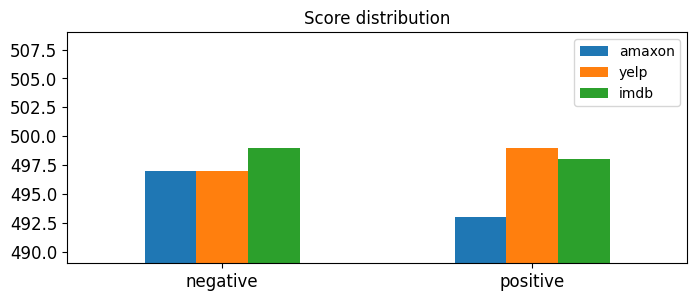

In [92]:
# plot with pandas with source and score
a = pd.DataFrame({'amaxon': df_amazon,
                  'yelp': df_yelp,
                  'imdb': df_imdb})
maxium = max(max(df_amazon), max(df_yelp), max(df_imdb))
lower_bound = maxium - 10
upper_bound = maxium + 10
a.plot(kind = 'bar',
        title = 'Score distribution',
        ylim = [lower_bound, upper_bound],
        rot = 0, fontsize = 12, figsize = (8,3))

In [93]:
# show the statistics
print('\033[36mdf statistic:\033[0m')
print(df.score.value_counts())
print('\033[36mdf sample statistic:\033[0m')
print(df_sample.score.value_counts())
# get the plot data
df_plot = df.score.value_counts()
df_sample_plot = df_sample.score.value_counts()                                         

df statistic:
negative    1493
positive    1490
Name: score, dtype: int64
df sample statistic:
positive    254
negative    246
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Score distribution'}>

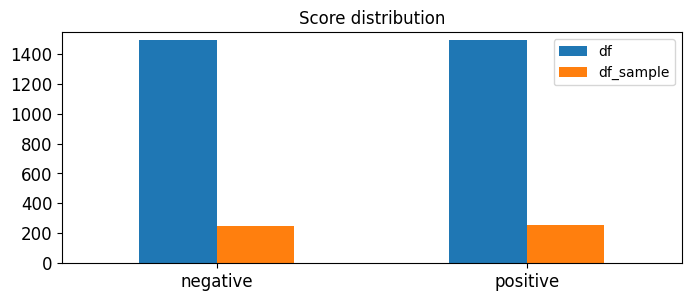

In [94]:
# plot with pandas with all data
a = pd.DataFrame({'df': df_plot,
                  'df_sample': df_sample_plot})
max_df = max(df.score.value_counts())
max_df_sample = max(df_sample.score.value_counts())
a.plot(kind = 'bar',
        title = 'Score distribution',
        ylim = [0, max(max_df, max_df_sample) + 50],
        rot = 0, fontsize = 12, figsize = (8,3))

**3.2 Feature creation**

In [95]:
import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [96]:
# take a look to the first data
df.loc[0]['unigrams']

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter',
 '.']

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [98]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [99]:
df_counts.shape

(2983, 5155)

In [100]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

Visualize the term-document result

In [101]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["sen_"+ str(i) for i in list(df.index)]
plot_z = df_counts.toarray()

Show the 20 most commonly used terms in the first 20 sentence.

In [102]:
# get the first 20 document
df_20 = df[:20]
# get the 20 most commonly used terms
count_vect_top20 = CountVectorizer(max_features=20)
df_counts_20 = count_vect_top20.fit_transform(df_20.sentence) #learn the vocabulary and return document-term matrix
df_counts_20.shape

(20, 20)

In [103]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect_top20.get_feature_names_out()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_20.index)]
# obtain document features
plot_z = df_counts_20.toarray()

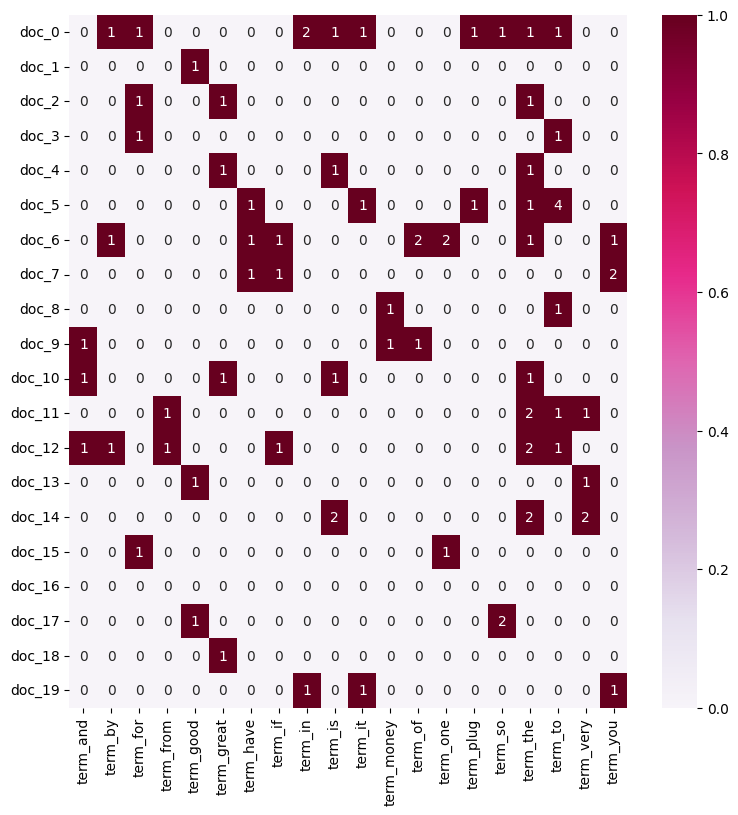

In [104]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**3.3 Dimension reduction**

In [105]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [106]:
df_reduced.shape

(2983, 2)

In [107]:
scores = ['negative', 'positive']

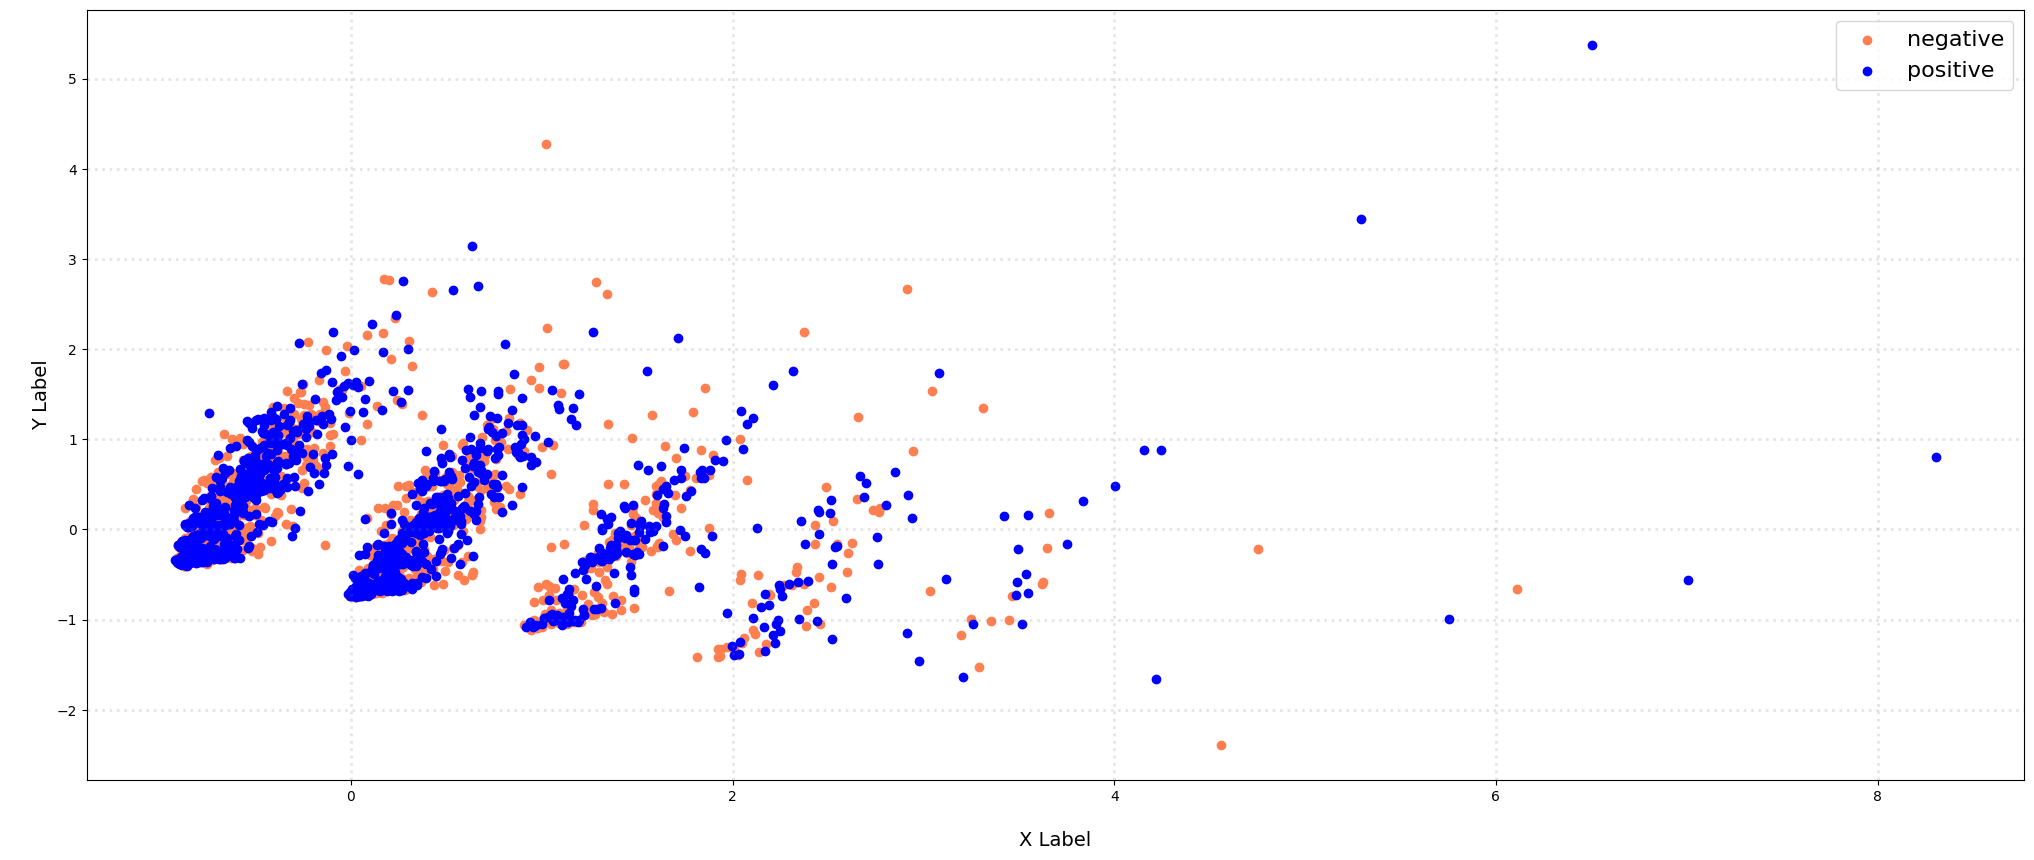

In [108]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o', label = score)

ax.legend(fontsize=16)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label', fontsize=14)
ax.set_ylabel('\nY Label', fontsize=14)

plt.show()

**3.4 Attribute Transformation / Aggregation**

In [109]:
# get the term frequency
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [110]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

1

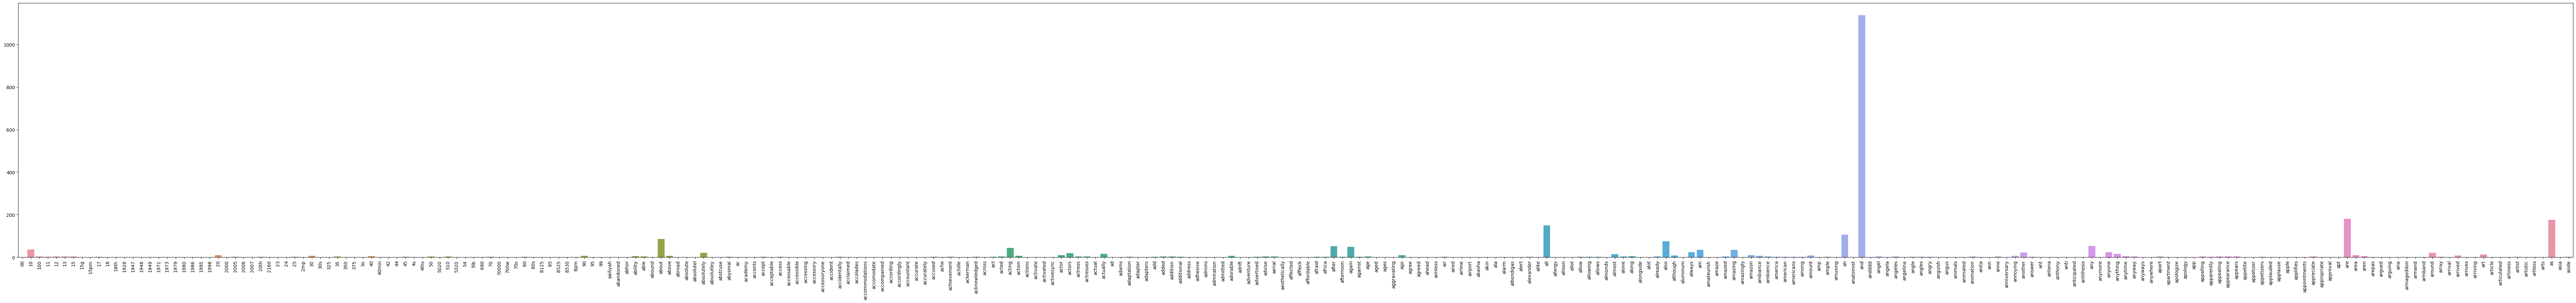

In [111]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Plot the long tail.

In [112]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [113]:
sorted_df_count_vect = []
# get the term-frequency pair to sort
for x, y in zip(count_vect.get_feature_names_out(), term_frequencies):
    sorted_df_count_vect.append((x, y))

In [114]:
# sort the terms by frequency
sorted_df_count_vect.sort(key = lambda s: s[1], reverse = True)

In [115]:
# get the x-axis and y-axis to plot the long-tail
x_plot = np.array([x[0] for x in sorted_df_count_vect])
y_plot = np.array([x[1] for x in sorted_df_count_vect])

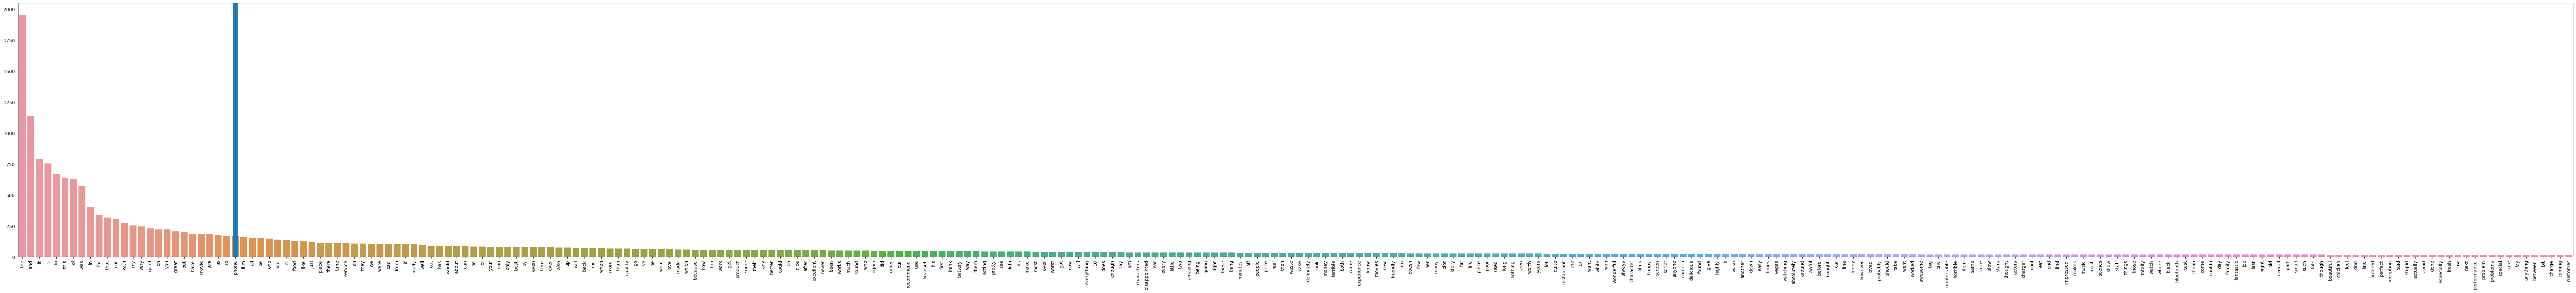

In [116]:
plt.subplots(figsize=(100, 10))
plt.axvline(x=findEvenIndex(y_plot[:300]), linewidth=10)  # show the boundary of long tail part
g = sns.barplot(x=x_plot[:300], 
                y=y_plot[:300])
g.set_xticklabels(x_plot[:300], rotation = 90);

**3.5 Discretization and Binarization**

In [117]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)

LabelBinarizer()

In [118]:
df['bin_category'] = mlb.transform(df['score']).tolist()
df[:10]

sentence     score  source  \
0  So there is no way for me to plug it in here i...  negative  amazon   
1                        Good case, Excellent value.  positive  amazon   
2                             Great for the jawbone.  positive  amazon   
3  Tied to charger for conversations lasting more...  negative  amazon   
4                                  The mic is great.  positive  amazon   
5  I have to jiggle the plug to get it to line up...  negative  amazon   
6  If you have several dozen or several hundred c...  negative  amazon   
7        If you are Razr owner...you must have this!  positive  amazon   
8                Needless to say, I wasted my money.  negative  amazon   
9                   What a waste of money and time!.  negative  amazon   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]  
9       [What, a, waste, of, money, and, time, !, .]          [0]

### Data Exploration - Cosine Similarity

In [119]:
# retrieve 3 sentences randomly
document_to_transform_1 = []
random_record_1 = df.iloc[10]
document_to_transform_1.append(random_record_1['sentence'])

document_to_transform_2 = []
random_record_2 = df.iloc[200]
document_to_transform_2.append(random_record_2['sentence'])

document_to_transform_3 = []
random_record_3 = df.iloc[2050]
document_to_transform_3.append(random_record_3['sentence'])

In [120]:
print(random_record_1['score'], random_record_2['score'], random_record_3['score'])

positive positive negative


In [121]:
print(document_to_transform_1, '\n', document_to_transform_2, '\n', document_to_transform_3)

['And the sound quality is great.'] 
 ['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.'] 
 ['I was very disappointed in the movie.  ']


In [122]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [123]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)


print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.384900
Cosine Similarity using count bw 1 and 3: 0.166667
Cosine Similarity using count bw 2 and 3: 0.192450
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


Cosine similarity between a sentence and itself is 1. Between sentence 1 and 2, since they have same score (positive), they may have higher similarity.

## Part 3: Different tasks of data mining

### 1. Generate meaningful new data visualizations

**1.1 Word Cloud**

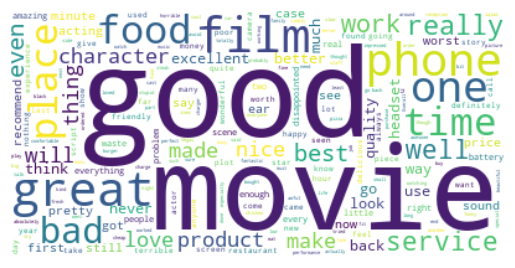

In [124]:
# Import word cloud library
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate a word cloud image
text = " ".join(i for i in df.sentence)
wordcloud = WordCloud(background_color="white").generate(text)

# plot
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**1.2 Visualize cosine similarity**

In [125]:
# retrive the sentences
# transform to term-document
# Binarize vectors to simplify
# In the previous part, there is only one sentence to transform using binarize. 
# Here, the sentences is appended into document_vector_count_bin list, therefore we need to squeeze the array to fit the cosine_similarity function.
document_vector_count = []
document_vector_count_bin = []
for i in range(df.shape[0]):
    document_to_transform = []
    document_to_transform.append(df.iloc[i]['sentence'])
    document_vector_count.append(count_vect.transform(document_to_transform))
    document_vector_count_bin.append(binarize(document_vector_count[i]).A.squeeze().tolist())


In [126]:
# calculate the similarity
df_cal_similarity = pd.DataFrame(np.array(document_vector_count_bin))
similarity_matrix = cosine_similarity(df_cal_similarity)

In [127]:
similarity_matrix

array([[1.        , 0.        , 0.23570226, ..., 0.31622777, 0.        ,
        0.13074409],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31622777, 0.        , 0.        , ..., 1.        , 0.        ,
        0.12403473],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13074409, 0.        , 0.        , ..., 0.12403473, 0.        ,
        1.        ]])

In [128]:
similarity_matrix.shape[0]

2983

In [129]:
col = []
for i in range(similarity_matrix.shape[0]):
    col.append("sen_"+str(i))

In [130]:
df_similarity = pd.DataFrame(similarity_matrix, columns = col, index = col)
df_similarity

sen_0  sen_1     sen_2     sen_3     sen_4     sen_5     sen_6  \
sen_0     1.000000    0.0  0.235702  0.136083  0.235702  0.272166  0.111111   
sen_1     0.000000    1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
sen_2     0.235702    0.0  1.000000  0.144338  0.500000  0.144338  0.117851   
sen_3     0.136083    0.0  0.144338  1.000000  0.000000  0.083333  0.000000   
sen_4     0.235702    0.0  0.500000  0.000000  1.000000  0.144338  0.117851   
...            ...    ...       ...       ...       ...       ...       ...   
sen_2978  0.000000    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
sen_2979  0.065372    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
sen_2980  0.316228    0.0  0.000000  0.000000  0.223607  0.129099  0.000000   
sen_2981  0.000000    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
sen_2982  0.130744    0.0  0.000000  0.080064  0.000000  0.080064  0.130744   

             sen_7     sen_8     sen_9  ...  sen_2973  sen_2974  sen_2975  \
sen_0     0.000000  0.096225  0.000000  ...  0.166667  0.166667  0.000000   
sen_1     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
sen_2     0.000000  0.000000  0.000000  ...  0.117851  0.176777  0.223607   
sen_3     0.000000  0.117851  0.000000  ...  0.068041  0.000000  0.000000   
sen_4     0.000000  0.000000  0.000000  ...  0.235702  0.176777  0.223607   
...            ...       ...       ...  ...       ...       ...       ...   
sen_2978  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.141421   
sen_2979  0.098058  0.000000  0.000000  ...  0.065372  0.098058  0.000000   
sen_2980  0.000000  0.000000  0.000000  ...  0.105409  0.158114  0.000000   
sen_2981  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
sen_2982  0.000000  0.226455  0.452911  ...  0.196116  0.196116  0.000000   

          sen_2976  sen_2977  sen_2978  sen_2979  sen_2980  sen_2981  sen_2982  
sen_0     0.105409  0.000000       0.0  0.065372  0.316228       0.0  0.130744  
sen_1     0.000000  0.000000       0.0  0.000000  0.000000       0.0  0.000000  
sen_2     0.000000  0.000000       0.0  0.000000  0.000000       0.0  0.000000  
sen_3     0.000000  0.000000       0.0  0.000000  0.000000       0.0  0.080064  
sen_4     0.000000  0.000000       0.0  0.000000  0.223607       0.0  0.000000  
...            ...       ...       ...       ...       ...       ...       ...  
sen_2978  0.000000  0.000000       1.0  0.000000  0.000000       0.0  0.000000  
sen_2979  0.000000  0.000000       0.0  1.000000  0.124035       0.0  0.076923  
sen_2980  0.200000  0.000000       0.0  0.124035  1.000000       0.0  0.124035  
sen_2981  0.000000  0.000000       0.0  0.000000  0.000000       1.0  0.000000  
sen_2982  0.000000  0.113228       0.0  0.076923  0.124035       0.0  1.000000  

[2983 rows x 2983 columns]

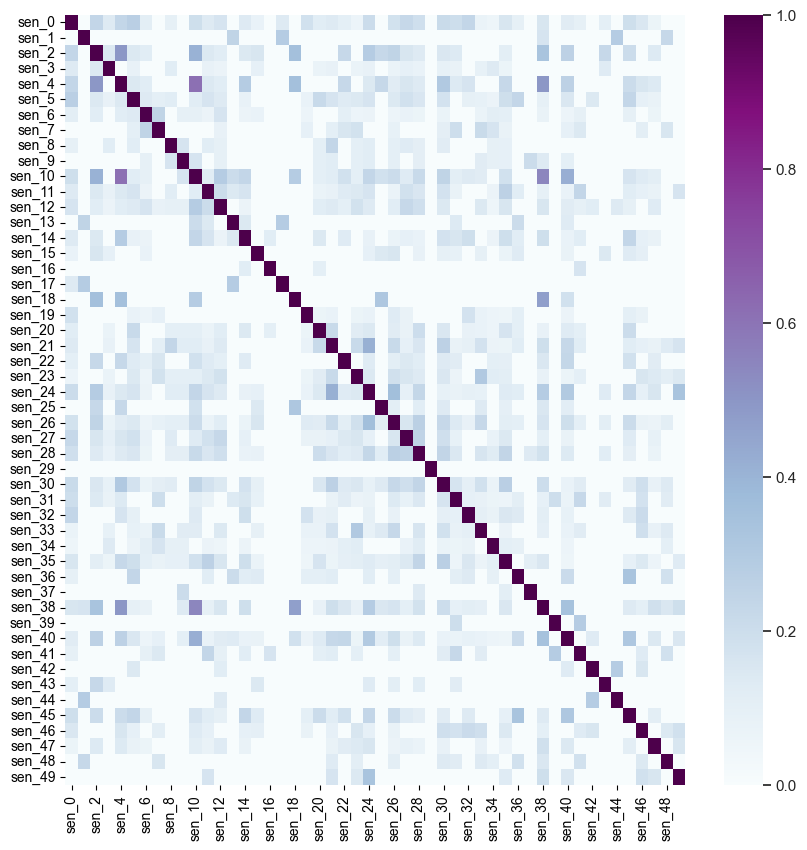

In [131]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
sns.heatmap(df_similarity.iloc[:50, :50], cmap='BuPu')
plt.xticks(rotation=90)
plt.show()

For the heapmap, we can observe the value on the diagonal line is one since the same sentence has the same similarity. Also, the matrix is symmetrical with the diagonal line since the similarity is symmetrical.

### 2. TF-IDF

In [132]:
df

sentence     score  source  \
0     So there is no way for me to plug it in here i...  negative  amazon   
1                           Good case, Excellent value.  positive  amazon   
2                                Great for the jawbone.  positive  amazon   
3     Tied to charger for conversations lasting more...  negative  amazon   
4                                     The mic is great.  positive  amazon   
...                                                 ...       ...     ...   
2978  I just got bored watching Jessice Lange take h...  negative    imdb   
2979  Unfortunately, any virtue in this film's produ...  negative    imdb   
2980                   In a word, it is embarrassing.    negative    imdb   
2981                               Exceptionally bad!    negative    imdb   
2982  All in all its an insult to one's intelligence...  negative    imdb   

                                               unigrams bin_category  
0     [So, there, is, no, way, for, me, to, plug, it...          [0]  
1                  [Good, case, ,, Excellent, value, .]          [1]  
2                         [Great, for, the, jawbone, .]          [1]  
3     [Tied, to, charger, for, conversations, lastin...          [0]  
4                              [The, mic, is, great, .]          [1]  
...                                                 ...          ...  
2978  [I, just, got, bored, watching, Jessice, Lange...          [0]  
2979  [Unfortunately, ,, any, virtue, in, this, film...          [0]  
2980          [In, a, word, ,, it, is, embarrassing, .]          [0]  
2981                            [Exceptionally, bad, !]          [0]  
2982  [All, in, all, its, an, insult, to, one, 's, i...          [0]  

[2983 rows x 5 columns]

In [133]:
# corpus = []
# for i in range(df.shape[0]):
#     corpus.append(df.sentence[i])

In [134]:
# len(corpus)

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tfidf_matrix = tf_transformer.fit_transform(df.sentence)
print(tfidf_matrix.shape)

(2983, 5155)


In [136]:
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [137]:
terms = tf_transformer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_matrix.sum(axis=0)

/Users/vivian/anaconda3/envs/DM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [138]:
row = []
for i in range(tfidf_matrix.shape[0]):
    row.append("sen_"+str(i))

In [139]:
# TF-IDF features
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = terms, index = row)
df_tfidf

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  \
sen_0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...   
sen_2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   

          yukon  yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
sen_0       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_1       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_3       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_4       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...         ...  ...    ...  ...    ...   ...      ...     ...      ...  
sen_2978    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2979    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2980    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2981    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2982    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5155 columns]

In [140]:
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])

In [141]:
df_tfidf_ranking = ranking.sort_values('rank', ascending = False)
df_tfidf_ranking.head()

term        rank
4531   the  176.914438
216    and  118.548045
2432    it  113.735335
2427    is  106.388712
4558  this   96.864495

We can observe that the terms with higher ranking are almost stopwords, which cannot show the main meaning of the text. Therefore, I removed the stopwords. Let's see how the result change.

In [142]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
stopwords_eng = stopwords.words('english')

In [144]:
df

sentence     score  source  \
0     So there is no way for me to plug it in here i...  negative  amazon   
1                           Good case, Excellent value.  positive  amazon   
2                                Great for the jawbone.  positive  amazon   
3     Tied to charger for conversations lasting more...  negative  amazon   
4                                     The mic is great.  positive  amazon   
...                                                 ...       ...     ...   
2978  I just got bored watching Jessice Lange take h...  negative    imdb   
2979  Unfortunately, any virtue in this film's produ...  negative    imdb   
2980                   In a word, it is embarrassing.    negative    imdb   
2981                               Exceptionally bad!    negative    imdb   
2982  All in all its an insult to one's intelligence...  negative    imdb   

                                               unigrams bin_category  
0     [So, there, is, no, way, for, me, to, plug, it...          [0]  
1                  [Good, case, ,, Excellent, value, .]          [1]  
2                         [Great, for, the, jawbone, .]          [1]  
3     [Tied, to, charger, for, conversations, lastin...          [0]  
4                              [The, mic, is, great, .]          [1]  
...                                                 ...          ...  
2978  [I, just, got, bored, watching, Jessice, Lange...          [0]  
2979  [Unfortunately, ,, any, virtue, in, this, film...          [0]  
2980          [In, a, word, ,, it, is, embarrassing, .]          [0]  
2981                            [Exceptionally, bad, !]          [0]  
2982  [All, in, all, its, an, insult, to, one, 's, i...          [0]  

[2983 rows x 5 columns]

In [145]:
# remove stopwords and punctuation
import string
df['remove stopwords'] = df['unigrams'].apply(lambda x: [item for item in x if (item.lower() not in stopwords_eng and item.lower() not in string.punctuation)])
# turn into string and use' ' to seperate each terms
df['remove stopwords'] = [' '.join(map(str, l)) for l in df['remove stopwords']]

In [146]:
df

sentence     score  source  \
0     So there is no way for me to plug it in here i...  negative  amazon   
1                           Good case, Excellent value.  positive  amazon   
2                                Great for the jawbone.  positive  amazon   
3     Tied to charger for conversations lasting more...  negative  amazon   
4                                     The mic is great.  positive  amazon   
...                                                 ...       ...     ...   
2978  I just got bored watching Jessice Lange take h...  negative    imdb   
2979  Unfortunately, any virtue in this film's produ...  negative    imdb   
2980                   In a word, it is embarrassing.    negative    imdb   
2981                               Exceptionally bad!    negative    imdb   
2982  All in all its an insult to one's intelligence...  negative    imdb   

                                               unigrams bin_category  \
0     [So, there, is, no, way, for, me, to, plug, it...          [0]   
1                  [Good, case, ,, Excellent, value, .]          [1]   
2                         [Great, for, the, jawbone, .]          [1]   
3     [Tied, to, charger, for, conversations, lastin...          [0]   
4                              [The, mic, is, great, .]          [1]   
...                                                 ...          ...   
2978  [I, just, got, bored, watching, Jessice, Lange...          [0]   
2979  [Unfortunately, ,, any, virtue, in, this, film...          [0]   
2980          [In, a, word, ,, it, is, embarrassing, .]          [0]   
2981                            [Exceptionally, bad, !]          [0]   
2982  [All, in, all, its, an, insult, to, one, 's, i...          [0]   

                                       remove stopwords  
0                       way plug US unless go converter  
1                             Good case Excellent value  
2                                         Great jawbone  
3     Tied charger conversations lasting 45 minutes....  
4                                             mic great  
...                                                 ...  
2978      got bored watching Jessice Lange take clothes  
2979  Unfortunately virtue film 's production work l...  
2980                                  word embarrassing  
2981                                  Exceptionally bad  
2982        insult one 's intelligence huge waste money  

[2983 rows x 6 columns]

In [147]:
tfidf_matrix_RS = tf_transformer.fit_transform(df["remove stopwords"])
print(tfidf_matrix_RS.shape)

(2983, 5058)


In [148]:
terms = tf_transformer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_matrix_RS.sum(axis=0)

/Users/vivian/anaconda3/envs/DM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [149]:
row = []
for i in range(tfidf_matrix_RS.shape[0]):
    row.append("sen_"+str(i))

In [150]:
# TF-IDF features
df_tfidf_RS = pd.DataFrame(tfidf_matrix_RS.toarray(), columns = terms, index = row)
df_tfidf_RS

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  \
sen_0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...   
sen_2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   
sen_2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   

          yukon  yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
sen_0       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_1       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_3       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_4       0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...         ...  ...    ...  ...    ...   ...      ...     ...      ...  
sen_2978    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2979    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2980    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2981    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2982    0.0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5058 columns]

In [151]:
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])

In [152]:
df_tfidf_ranking_RS = ranking.sort_values('rank', ascending = False)
df_tfidf_ranking_RS.head()

term       rank
1963     good  65.535243
1992    great  64.262539
3260    phone  45.639216
2902    movie  44.340344
3931  service  40.002468

Now we can see that the terms with higher rank is more reliable. Also compare to the word cloud in the previous part, they have similar keywords.

In [153]:
# get the x-axis and y-axis to plot the long-tail
x_plot = np.array(df_tfidf_ranking_RS["term"])
y_plot = np.array(df_tfidf_ranking_RS["rank"])

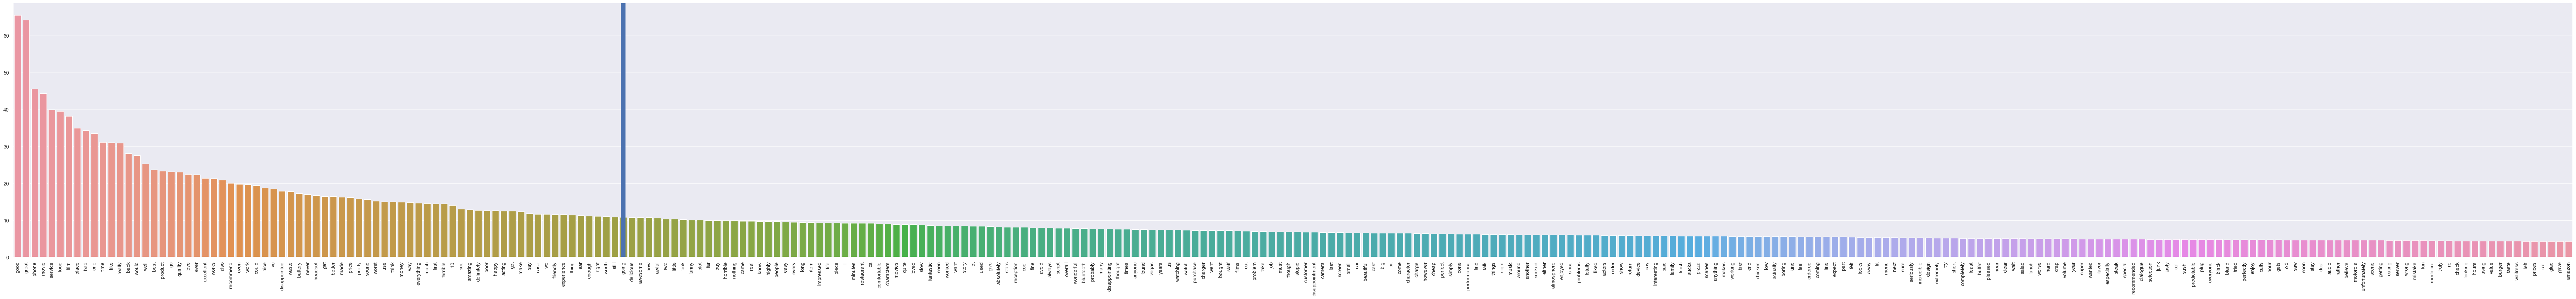

In [154]:
plt.subplots(figsize=(100, 10))
plt.axvline(x=findEvenIndex(y_plot[:300]), linewidth=10)  # show the boundary of long tail part
g = sns.barplot(x=x_plot[:300], 
                y=y_plot[:300])
g.set_xticklabels(x_plot[:300], rotation = 90);

### 3. Naive Bayes classifier

**3.1 Term frequency**

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [156]:
df_counts.toarray().shape

(2983, 5155)

In [157]:
row = []
for i in range(df_counts.toarray().shape[0]):
    row.append("sen_"+str(i))

In [158]:
df_term_freq_X = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names(), index = row)
df_term_freq_y = pd.DataFrame(df['score'], columns = ['score']).values.ravel()

/Users/vivian/anaconda3/envs/DM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [159]:
# seperate the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df_term_freq_X, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)

In [160]:
# Naive Bayes
# use grid to try different parameter
param_grid = {}
param_grid['alpha'] = [0.001, 0.01, 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc : %s with %s' % (grid_result.best_score_, grid_result.best_params_))

best acc : 0.8146646117040854 with {'alpha': 1.0}


**TF-IDF**

In [161]:
df_tfidf.shape

(2983, 5155)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)

In [163]:
# Naive Bayes
param_grid = {}
param_grid['alpha'] = [0.001, 0.01, 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc : %s with %s' % (grid_result.best_score_, grid_result.best_params_))

best acc : 0.8127415347810085 with {'alpha': 1.0}


**<font color="red">Discussion</font>**

The preformances of two wat to extract features doesn't have much difference.

### Part 4: Efficiency Improvement

**4.1 Removing stopwords**

In most of time, we tend to remove stopwords in order to remove noise of data. Stopwords are meaningless which cannot show the meaning of an article or a sentence. From the term rankings of TFIDF, we can observe that the one with removing stopwords show the main topic of this set of data efficiently, while the other doesn't show any meaning.

**4.2 Operations on np.array**

Numpy provides sereral functions on np.array, such as `sum`, `mean`, etc. This functions help reducing the compute time on array. For example, we can use `sum` to calculate the term-frequency more frequently.

**4.3 Plotting the document-term matrix**

Obviously, since the aomunt of data is too large to plot with `seabons`, `spy` is a better way to plot the entire document-term matrix.

Let's import `time` to show the computing time.

In [164]:
import time

`spy`

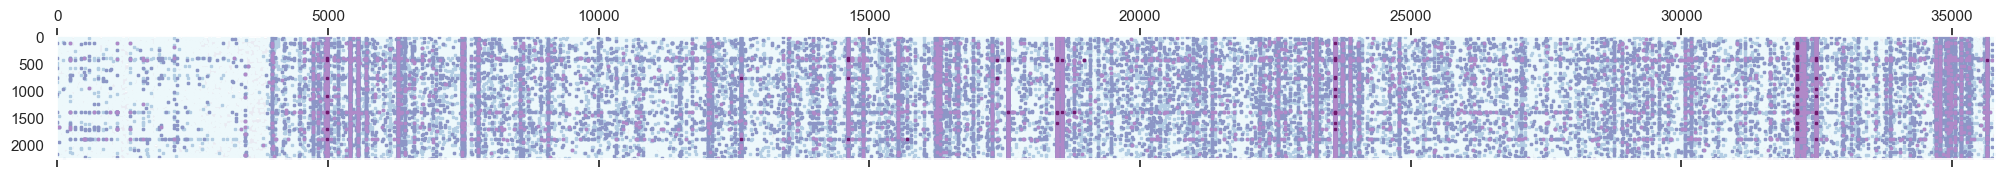

computing time:  0.3177669048309326 sec


In [165]:
start = time.time()

plt.subplots(figsize=(25, 15))
# different precisions correspond to different color
precisions = [0, 2, 3, 8, 20, 100]
colors = ['#edf8fb', '#b3cde3', '#8c96c6', '#b089c8', '#b089c8', '#71196d']

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision = p, color = c, markersize=2)
plt.grid('on')
plt.show()

print('computing time: ', time.time()-start, 'sec')

`seabons`

In [166]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
# obtain document features
plot_z = X_counts[0:100, 0:100].toarray()

computing time:  1.376216173171997 sec


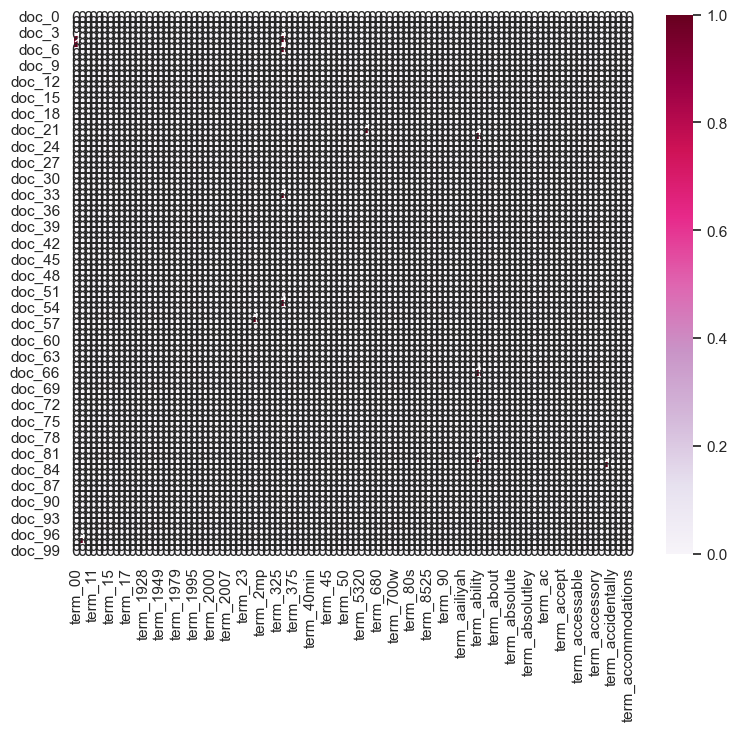

In [167]:
start = time.time()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

print('computing time: ', time.time()-start, 'sec')

The computing time of `seabons` is higher than `spy` one. Further, the `seabons` way only plot the first 100 terms.